# CHEE 426 Project 1
Spring 2024

This is my jupyter notebook for Project 1. I used the following features / variables to develop a regression to model CO(g/mi) emmisions:

Vehicle Manufacturer Name, Test Veh Displacement (L), Rated Horsepower, # of Cylinders and Rotors, # of Gears, Equivalent Test Weight (lbs.), Axle Ratio, N/V Ratio, THC (g/mi), CO (g/mi), CO2 (g/mi), NOx (g/mi), PM (g/mi), CH4 (g/mi), N2O (g/mi)

## Problem Statement:

This Project 1 for the course is the application of the concepts and techniques for the materials covered in Chapter 1 and 2. The problem you have to solve is to develop a regression model for the prediction of CO emissions of light-duty vehicles by training on the fuel economy dataset collected by US-EPA for vehicle model year 2024. 

## Import Python Modules (packages) 
Packages are where we will get functions to use in the workflow.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv('proj1data.csv')
len(df)

3114

## Preprocess and Prepare Data

In [3]:
df.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2024,aston martin,ASX,Aston Martin,DB12 V8,5723PT5601,0,4.0,RASXV04.0AES,Car,...,5.67,0.0083,0.0221,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2024,aston martin,ASX,Aston Martin,DB12 V8,5723PT5601,0,4.0,RASXV04.0AES,Car,...,5.67,0.0083,0.0221,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2024,aston martin,ASX,Aston Martin,DBX,8001PT8342,1,4.0,MASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2024,aston martin,ASX,Aston Martin,DBX,8001PT8342,1,4.0,MASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2024,aston martin,ASX,Aston Martin,DBX 707,8841PT8473,0,4.0,PASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [4]:
df.columns

Index(['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code',
       'Represented Test Veh Make', 'Represented Test Veh Model',
       'Test Vehicle ID', 'Test Veh Configuration #',
       'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type',
       'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code',
       'Tested Transmission Type Code', 'Tested Transmission Type',
       '# of Gears', 'Transmission Lockup?', 'Drive System Code',
       'Drive System Description', 'Transmission Overdrive Code',
       'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
       'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd',
       'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator',
       'Analytically Derived FE?', 'ADFE Test Number',
       'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)',
       'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description',
       'Test Fuel Type Cd', 'Test Fuel Type Descripti

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_', regex=True) # replace all spaces with '_'
df.columns = df.columns.str.lower().str.replace('[^\w]','', regex=True) # then remove all spacial characters

In [6]:
df.columns

Index(['model_year', 'vehicle_manufacturer_name', 'veh_mfr_code',
       'represented_test_veh_make', 'represented_test_veh_model',
       'test_vehicle_id', 'test_veh_configuration_', 'test_veh_displacement_l',
       'actual_tested_testgroup', 'vehicle_type', 'rated_horsepower',
       '_of_cylinders_and_rotors', 'engine_code',
       'tested_transmission_type_code', 'tested_transmission_type',
       '_of_gears', 'transmission_lockup', 'drive_system_code',
       'drive_system_description', 'transmission_overdrive_code',
       'transmission_overdrive_desc', 'equivalent_test_weight_lbs',
       'axle_ratio', 'nv_ratio', 'shift_indicator_light_use_cd',
       'shift_indicator_light_use_desc', 'test_number', 'test_originator',
       'analytically_derived_fe', 'adfe_test_number',
       'adfe_total_road_load_hp', 'adfe_equiv_test_weight_lbs',
       'adfe_nv_ratio', 'test_procedure_cd', 'test_procedure_description',
       'test_fuel_type_cd', 'test_fuel_type_description', 'test_categ

In [7]:
df.head()

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_,test_veh_displacement_l,actual_tested_testgroup,vehicle_type,...,set_coef_a_lbf,set_coef_b_lbfmph,set_coef_c_lbfmph2,aftertreatment_device_cd,aftertreatment_device_desc,police__emergency_vehicle,averaging_group_id,averaging_weighting_factor,averaging_method_cd,averging_method_desc
0,2024,aston martin,ASX,Aston Martin,DB12 V8,5723PT5601,0,4.0,RASXV04.0AES,Car,...,5.67,0.0083,0.0221,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2024,aston martin,ASX,Aston Martin,DB12 V8,5723PT5601,0,4.0,RASXV04.0AES,Car,...,5.67,0.0083,0.0221,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2024,aston martin,ASX,Aston Martin,DBX,8001PT8342,1,4.0,MASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2024,aston martin,ASX,Aston Martin,DBX,8001PT8342,1,4.0,MASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2024,aston martin,ASX,Aston Martin,DBX 707,8841PT8473,0,4.0,PASXJ04.0AEX,Both,...,-4.88,-0.5318,0.0367,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


# Exploratory data analysis

C:\Users\renee\anaconda\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


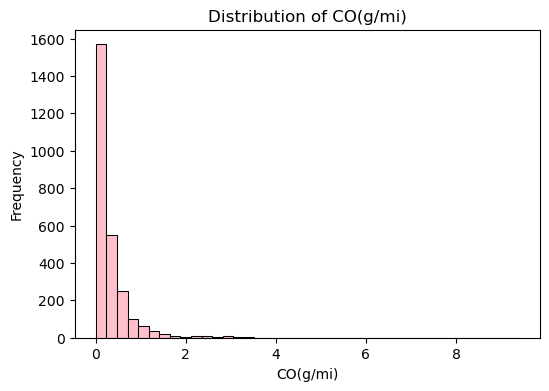

In [8]:
# Let us look at the distribution of values in the targte output Y whihc is CO
plt.figure(figsize=(6, 4))

sns.histplot(df.co_gmi, bins=40, color='pink', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('CO(g/mi)')
plt.title('Distribution of CO(g/mi)')

plt.show()

C:\Users\renee\anaconda\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


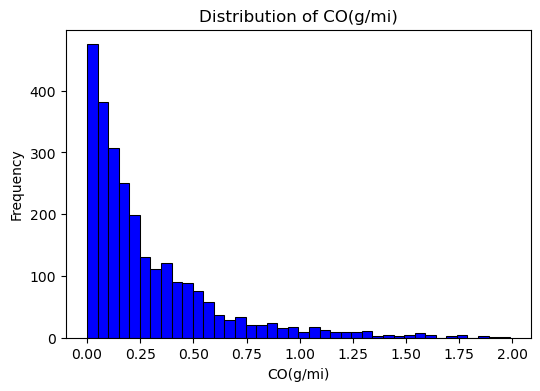

In [9]:
# Let's see the distribution at the lower values of CO

plt.figure(figsize=(6, 4))

sns.histplot(df.co_gmi[df.co_gmi < 2], bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('CO(g/mi)')
plt.title('Distribution of CO(g/mi)')

plt.show()

C:\Users\renee\anaconda\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


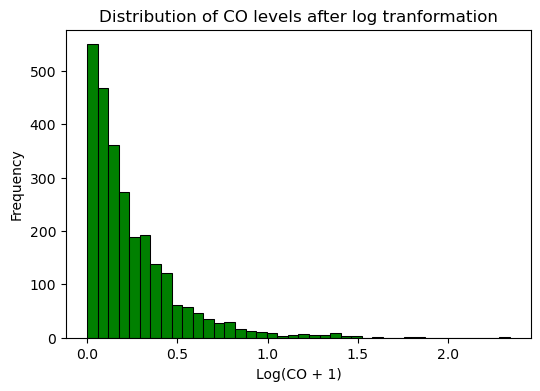

In [10]:
log_co = np.log1p(df.co_gmi)

plt.figure(figsize=(6, 4))

sns.histplot(log_co, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(CO + 1)')
plt.title('Distribution of CO levels after log tranformation')

plt.show()

# Based on the graph below, log-transformation does not signficantly change the look of CO distribution, 
# so log-transform on CO will not have significant improvement effect on the eventual model

In [11]:
df.isnull().sum()

model_year                       0
vehicle_manufacturer_name        0
veh_mfr_code                     0
represented_test_veh_make        0
represented_test_veh_model       0
                              ... 
police__emergency_vehicle        0
averaging_group_id            3084
averaging_weighting_factor    3084
averaging_method_cd              0
averging_method_desc             0
Length: 67, dtype: int64

## Validation framework

In [12]:
# Set random number seed for reproducility of results by other users of the notebook
np.random.seed(2)


# Since the target var CO cannot have NULL values, let's remove the rows (data-points) that have CO=NULL or NaN or NA
# We have to do this before we perform the succeeding steps of splitting the dataset

df = df.dropna(subset = ['co_gmi'])

# Now splitting the dataset using 20% for Test set and the remianing 80% for Train+Val set
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()



In [13]:
# Note: The target Y for your Poject 1 is CO (g/mi)

y_train_orig = df_train.co_gmi.values
y_val_orig = df_val.co_gmi.values
y_test_orig = df_test.co_gmi.values

# no need for log-transform as shown above, so we just equate the vars
y_train = y_train_orig
y_val = y_val_orig
y_test = y_test_orig

# since CO is a Y variable, then delete it from the pool of potential X variables
del df_train['co_gmi']
del df_val['co_gmi']
del df_test['co_gmi']

## Linear Regression

In [14]:
# This is the linear regression algorithm (closed-form formula to compute the linear model coefficients)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution

In [15]:
# This is where you select your predicror variables or X variables.
# Remember your project constraint: use at least 10 X varibales (except CO(g/mi) or course), and at least 1 X-var is a categorical var
# How to know which X-var to select? Check the PDF document of Variable Definition, which is also uploaded in Moodle under Project 1
#

base = ['test_veh_displacement_l', 'rated_horsepower',
       '_of_cylinders_and_rotors', '_of_gears', 'equivalent_test_weight_lbs',
       'axle_ratio', 'nv_ratio', 'thc_gmi', 'co2_gmi', 'nox_gmi', 'pm_gmi', 'ch4_gmi',
       'n2o_gmi']

In [16]:
def prepare1_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [17]:
X_train = prepare1_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [18]:
y_train

array([1.10638  , 0.0361   , 0.0312183, ..., 0.749987 , 0.152    ,
       0.052334 ])

In [19]:
w_0

-0.409462299879647

In [20]:
y_pred = w_0 + X_train.dot(w)

C:\Users\renee\anaconda\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\renee\anaconda\envs\CHEE426\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


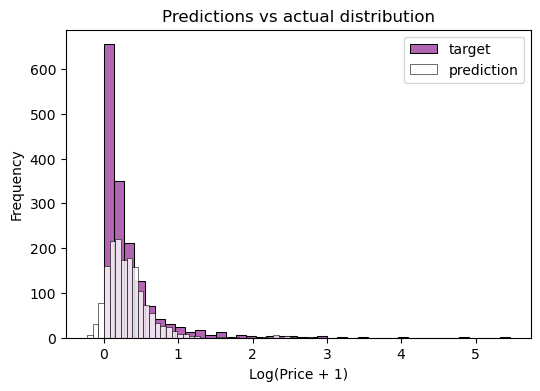

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='purple', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='white', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [22]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [23]:
rmse(y_train, y_pred)

0.32058288557797837

In [24]:
X_val = prepare1_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [25]:
rmse(y_val, y_pred)

6285.873961765548

## Simple feature engineering
Let use now include the 1 Categorical variable into the model as an X var.
I chose for this demo the variable VEHICLE TYPE with column name 'vehicle_type'. This is a categorical data, so we have to convert this to numeric data.
To convert to numeric, we use the "One-Hot Encoding" technique.

In [26]:
df['vehicle_manufacturer_name'].value_counts().head(50)

vehicle_manufacturer_name
GM                      458
Toyota                  399
BMW                     320
Volkswagen Group of     252
Hyundai                 184
Nissan                  147
Kia                     136
Jaguar Land Rover L     115
Porsche                 108
Honda                   104
FCA US LLC               94
Mercedes-Benz            55
Ferrari                  48
Subaru                   40
MAZDA                    40
FOMOCO                   38
Maserati                 35
Mitsubishi Motors Co     33
Volvo                    28
Rolls-Royce               8
aston martin              6
Name: count, dtype: int64

'vehicle_manufacturer_name' has 21 levels or categories: 

GM, Toyota, BMW, Volkswagen Group of, Hyundai, Nissan, Kia, Jaguar Land Rover L, Porsche, Honda, FCA US LLC, Mercedes-Benz, Ferrari, Subaru, MAZDA, FOMOCO, Maserati, Mitsubishi Motors Co, Volvo, Rolls-Royce, aston martin

Let us use these levels for One-Hot Encoding.

In [27]:
def prepare2_X(df):
    df = df.copy()
    features = base.copy()

    for v in ['GM', 'Toyota', 'BMW', 'Volkswagen Group of', 'Hyundai', 'Nissan', 'Kia', 'Jaguar Land Rover L', 'Porsche',
              'Honda', 'FCA US LLC', 'Mercedes-Benz', 'Ferrari', 'Subaru', 'MAZDA', 'FOMOCO', 'Maserati', 
              'Mitsubishi Motors Co', 'Volvo', 'Rolls-Royce', 'aston martin']:
        feature = 'is_type_%s' % v
        df[feature] = (df['vehicle_manufacturer_name'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
X_train = prepare2_X(df_train)

In [29]:
X_train

array([[  3. , 305. ,   6. , ...,   0. ,   0. ,   0. ],
       [  4. , 518. ,   6. , ...,   0. ,   0. ,   0. ],
       [  2. , 270. ,   4. , ...,   0. ,   0. ,   0. ],
       ...,
       [  2. , 237. ,   4. , ...,   0. ,   0. ,   0. ],
       [  2. , 146. ,   4. , ...,   0. ,   0. ,   0. ],
       [  1.2, 137. ,   3. , ...,   0. ,   0. ,   0. ]])

In [30]:
X_train.shape

(1590, 34)

## Training Another Linear Regression Model 
Now including the VEHICLE TYPE variable.

In [31]:
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 2.3244370008192967
validation: 161826.8293533195


## Regularization

In [32]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
X_train = prepare2_X(df_train)

In [34]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

    0, -7.79, 0.00, -0.08
0.001, -0.17, -0.00, -0.03
 0.01, -0.15, -0.00, -0.03
  0.1, -0.10, -0.00, -0.04
    1, -0.02, -0.00, -0.05
   10, 0.04, -0.00, -0.05


In [35]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 2.3244370008192967
val 161826.8293533195


In [36]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.30978432194916616
val 140.53625466959036


In [37]:
X_train = prepare2_X(df_train)
X_val = prepare2_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 5706.830185102248
0.0001 4080.240781273735
 0.001 1138.0712518432338
  0.01 140.53625466959036
   0.1 13.994913315572218
     1 1.1213366296573681
     5 0.3782050142427583
    10 0.36621348451318525


In [38]:
X_train = prepare2_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare2_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare2_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 140.53625466959036
test: 140.5257320716306


## Using the model

In [39]:
# Let us select a vehicle in the Test set to predict its CO emission
# with index=2, this is a 2024, Mercedes-Benz, Model: CLA 250 4MATIC

i = 2
ad = df_test.iloc[i].to_dict()
ad

{'model_year': 2024,
 'vehicle_manufacturer_name': 'Mercedes-Benz',
 'veh_mfr_code': 'MBX',
 'represented_test_veh_make': 'Mercedes-Benz',
 'represented_test_veh_model': 'CLA 250 4MATIC',
 'test_vehicle_id': 'C118E20DETC-Z2462',
 'test_veh_configuration_': 0,
 'test_veh_displacement_l': 1.991,
 'actual_tested_testgroup': 'RMBXJ02.0HY2',
 'vehicle_type': 'Both',
 'rated_horsepower': 221,
 '_of_cylinders_and_rotors': 4.0,
 'engine_code': 'M260-20DETC',
 'tested_transmission_type_code': 'AM',
 'tested_transmission_type': 'Automated Manual',
 '_of_gears': 8,
 'transmission_lockup': 'Y',
 'drive_system_code': 'A',
 'drive_system_description': 'All Wheel Drive',
 'transmission_overdrive_code': 2,
 'transmission_overdrive_desc': 'Top gear ratio < 1',
 'equivalent_test_weight_lbs': 3875,
 'axle_ratio': 2.68,
 'nv_ratio': 24.1,
 'shift_indicator_light_use_cd': 1,
 'shift_indicator_light_use_desc': 'Not eqipped',
 'test_number': 'RMBX10082670',
 'test_originator': 'MFR',
 'analytically_derived_f

In [40]:
X_test = prepare2_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
co_gmi_predicted = np.expm1(y_pred)
co_gmi_predicted

0.11119202726926658

In [41]:
# Here is the value of the observed CO(g/mi) in data sample i=2 in Y-test set
co_gmi_observed = y_test[i]
co_gmi_observed

0.1213448